In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [27]:
X,y= make_circles(n_samples=100,noise=0.1)

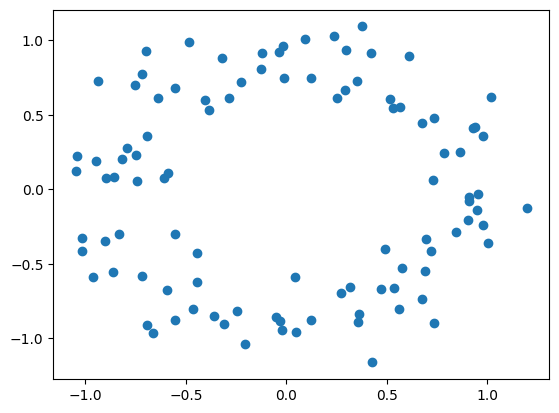

In [28]:
plt.scatter(X[:,0],X[:,1])

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0)

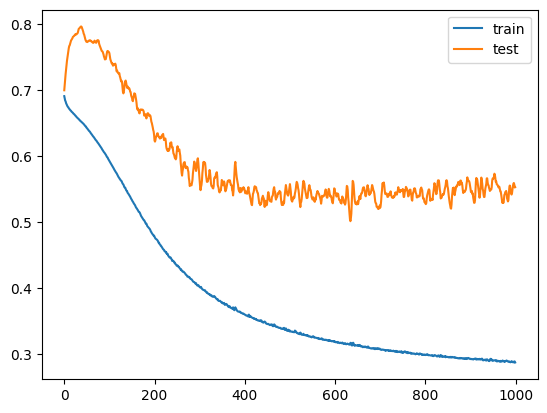

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [38]:
#now using early stopping
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [41]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 73ms/step - loss: 0.6936 - accuracy: 0.4875 - val_loss: 0.7098 - val_accuracy: 0.2500
Epoch 2/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.6895 - accuracy: 0.5625 - val_loss: 0.7163 - val_accuracy: 0.1500
Epoch 3/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6872 - accuracy: 0.5750 - val_loss: 0.7236 - val_accuracy: 0.1500
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6845 - accuracy: 0.5625 - val_loss: 0.7300 - val_accuracy: 0.1500
Epoch 5/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6821 - accuracy: 0.5875 - val_loss: 0.7353 - val_accuracy: 0.1500
Epoch 6/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6805 - accuracy: 0.5625 - val_loss: 0.7411 - val_accuracy: 0.1500
Epoch 7/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6790 - accuracy: 0.5500 - val_loss: 0.7467 - val_accuracy: 0.2000
Epoch 8/3500


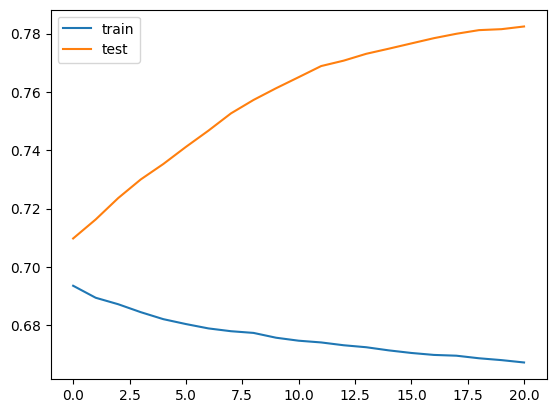

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()